In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
token = open('../list_p_pdot.csv','r')
token.readline()
linestoken=token.readlines()
name=[]
psrj=[]
p=[]
p1=[]
tau=[]
pb=[]
assoc=[]
for x in linestoken:
    if(x.split(';')[1]==str('*')):
        name.append(str('none'))
    else:
        name.append(str(x.split(';')[1]))
    
    #psrj.append((x.split(';')[2]))
    
    if(x.split(';')[3]==str('*')):
        p.append(np.NaN)
    else:
        p.append(float(x.split(';')[3]))
    
    if(x.split(';')[4]==str('*')):
        p1.append(np.NaN)
    else:
        p1.append(float(x.split(';')[4]))
    
    if(x.split(';')[5]==str('*')):
        tau.append(np.NaN)
    else:
        tau.append(float(x.split(';')[5]))  
    #tau.append((x.split(';')[5]))
    
    if(x.split(';')[6]==str('*')):
        pb.append(None)
    else:
        pb.append(float(x.split(';')[6]))
    
    if(x.split(';')[7]==str('*')):
        assoc.append(str('none'))
    else:
        assoc.append(str(x.split(';')[7]))
    #pb.append((x.split(';')[6]))
    #assoc.append((x.split(';')[7]))
token.close()



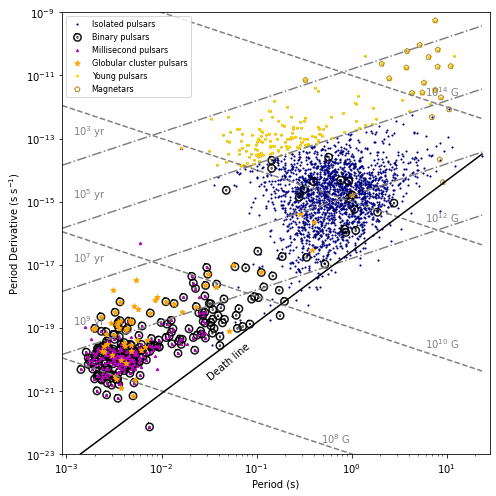

In [3]:
#print(p)
#print(pb)
plt.figure(figsize=(7,7))
plt.yscale('log')
plt.xscale('log')
#plt.yticks([1e-22,1e-17,1e-9])
plt.ylim(1e-23,1e-9)
#plt.scatter(p,p1,s=3,color='blue',)
iso_index=[]
bina_index=[]
msp_index=[]
normal_index=[]
assoc_GC_index=[]
p_iso=[] 
p1_iso=[]
p_bin=[]
p1_bin=[]
p_msp=[]
p1_msp=[]
p_normal=[]
p1_normal=[]
p_GC=[]
p1_GC=[]
p_mag=[]
p1_mag=[]
p_young=[]
p1_young=[]
magnetars=['J0100-7211','J0146+6145','J0418+5732','J0501+4516','J0525-6607','J1050-5953','J1550-5418', 'J1622-4950','J1635-4735','J1647-4552','J1708-4008','J1714-3810', 'J1745-2900','J1808-2024','J1809-1943','J1822-1604','J1833-0831','J1834-0845','J1841-456','J1852+0033','J1907+0919','J1935+2154','J2301+5852','J1846-0258']

def surf_mag_p1(B,p):
    pdot_mag=[]
    for pval in p:
        pdot_mag.append((B/10**(12))**2*(10**(-15))/pval)

    return pdot_mag

def age_p1(age,p):
    pdot_age=[]
    for pval in p:
        pdot_age.append(15.8e6*pval*1e-15/age)

    return pdot_age

def age(p,p1):
    tau_calc=[]
    tau_calc=15.8e6*p*(p1/1e-15)**(-1)
    return tau_calc

def p1_deathline(p):
    R=10e5 #cm 
    rho=1
    p1death=[]
    for pval in p:
        #p1death.append(10**(-12.4)/(pval))
        #p1death.append(10**(2*np.log(pval)-16.52+np.log(rho)))
        p1death.append(10**(((9./4)*np.log10(pval)) - 16.58 + np.log10(rho)))
    return p1death
    
    
for i in range(0,len(p),1):
    #print(i)
    
    if(pb[i]==None):
        iso_index.append(i)
        p_iso.append(p[i])
        p1_iso.append(p1[i])
    else:
        bina_index.append(i)
        p_bin.append(p[i])
        p1_bin.append(p1[i])
    
    if(p[i]<0.030):
        msp_index.append(i)
        p_msp.append(p[i])
        p1_msp.append(p1[i])
    elif(p[i]>0.030):
        normal_index.append(i)
        p_normal.append(p[i])
        p1_normal.append(p1[i])        

    if 'GC' in assoc[i]:
        assoc_GC_index.append(i)
        p_GC.append(p[i])
        p1_GC.append(p1[i])
        
    for j in range(0,len(magnetars),1):
        if magnetars[j] in name[i]:
            p_mag.append(p[i])
            p1_mag.append(p1[i])

tau_calc=[]    
young_gc_index=[]
young_gal_index=[]
for i in range(0,len(p),1):
    if(p1[i]!=0 and p1[i]>0.0):
        tau_var=age(p[i],p1[i])
        tau_calc.append(tau_var)
        #print('period is', p[i])
        #print('p1 is ',p1[i])
        #print('age is: ',tau_var)
        if(tau_var<10**5):
            #print('tau is:',tau_var)
            p_young.append(p[i])
            p1_young.append(p1[i])
            
            if 'GC' in assoc[i]:
                young_gc_index.append(i)
            else:
                
                young_gal_index.append(i)


nstep=max(p_iso)/1000
per=[]
pval=[]
for k in range(0,1000,1):
    p_var=0.9e-3+(nstep*k)
    per.append(p_var)

plt.xlim(min(per),1.2*max(per))

p1_mag_1e8=surf_mag_p1(1e8,per)
p1_mag_1e10=surf_mag_p1(1e10,per)
p1_mag_1e12=surf_mag_p1(1e12,per)
p1_mag_1e14=surf_mag_p1(1e14,per)

p1_age_1e3=age_p1(1e3,per)
p1_age_1e5=age_p1(1e5,per)
p1_age_1e7=age_p1(1e7,per)
p1_age_1e9=age_p1(1e9,per)

p1_death=p1_deathline(per)


plt.scatter(p_iso,p1_iso, s=5,color='navy',marker='.',label='Isolated pulsars')

plt.scatter(p_bin,p1_bin,s=70, color='black',facecolors='none',marker='$\\bigodot$',linewidth=0.7,label='Binary pulsars')
#plt.scatter(p_bin,p1_bin,color='black',s=2,marker="o")

plt.scatter(p_msp,p1_msp,s=5,color='m',marker='^',linewidth=1.0,label='Millisecond pulsars')

plt.scatter(p_GC,p1_GC,s=30,color='orange',marker="*",linewidth=1.0,label='Globular cluster pulsars')

plt.scatter(p_young,p1_young,s=5,color='gold',marker='v',label='Young pulsars')

plt.scatter(p_mag,p1_mag,s=30,color='darkgoldenrod',facecolors='none',linewidth=1.0,marker='p',label='Magnetars')

plt.plot(per,p1_mag_1e8,'--',color='gray')

plt.text(max(per)/50,max(p1_mag_1e8)/500,'10$^8$ G',fontsize=10,color='gray')

plt.plot(per,p1_mag_1e10,'--',color='gray')
plt.text(max(per)/4,max(p1_mag_1e10)/5000,'10$^{10}$ G',fontsize=10,color='gray')

plt.plot(per,p1_mag_1e12,'--',color='gray')
plt.text(max(per)/4,max(p1_mag_1e12)/5000,'10$^{12}$ G',fontsize=10,color='gray')

plt.plot(per,p1_mag_1e14,'--',color='gray')
plt.text(max(per)/4,max(p1_mag_1e14)/5000,'10$^{14}$ G',fontsize=10,color='gray')

plt.plot(per,p1_age_1e3,'-.',color='gray')
plt.text(max(per)/20000,max(p1_age_1e3)/3000,'10$^{3}$ yr',fontsize=10,color='gray')

plt.plot(per,p1_age_1e5,'-.',color='gray')
plt.text(max(per)/20000,max(p1_age_1e5)/3000,'10$^{5}$ yr',fontsize=10,color='gray')

plt.plot(per,p1_age_1e7,'-.',color='gray')
plt.text(max(per)/20000,max(p1_age_1e7)/3000,'10$^{7}$ yr',fontsize=10,color='gray')

plt.plot(per,p1_age_1e9,'-.',color='gray')
plt.text(max(per)/20000,max(p1_age_1e9)/3000,'10$^{9}$ yr',fontsize=10,color='gray')

plt.plot(per,p1_death,color='black')
plt.text((max(per)-min(per))/800,min(p1_death)*600,'Death line',fontsize=10,color='black',rotation=40)

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.tight_layout()
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
#plt.rc('', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('figure', titlesize=5)  # fontsize of the figure title

plt.xlabel('Period (s)')
plt.ylabel('Period Derivative (s s$^{-1}$)')
plt.legend()
plt.tight_layout()

plt.savefig('P-Pdot.pdf',format='pdf',dpi=600)
plt.show()        

In [4]:
print(len(p_bin))
print(len(p_msp))
print(len(p_bin)*100/len(p_msp))


345
532
64.84962406015038


In [46]:
print(len(young_gal_index))

158


In [47]:
print('Total number of pulsars:', len(name))
print('Total msps:', len(p_msp))
print('Total binaries:',len(p_bin))
print('Total isolated:',len(p_iso))
print('Total GC pulsars:',len(p_GC))

Total number of pulsars: 3319
Total msps: 532
Total binaries: 345
Total isolated: 2974
Total GC pulsars: 191


In [48]:
print(young_gal_index)

[2, 61, 94, 105, 122, 158, 201, 219, 230, 232, 237, 240, 249, 268, 288, 289, 323, 382, 408, 440, 481, 484, 497, 499, 514, 522, 525, 532, 540, 553, 560, 561, 572, 584, 603, 639, 643, 715, 802, 829, 835, 847, 851, 855, 857, 858, 868, 871, 873, 885, 926, 953, 979, 983, 984, 1007, 1044, 1073, 1076, 1093, 1104, 1154, 1167, 1185, 1235, 1253, 1265, 1276, 1282, 1311, 1400, 1403, 1419, 1438, 1449, 1466, 1491, 1492, 1533, 1548, 1555, 1577, 1586, 1590, 1598, 1615, 1658, 1667, 1673, 1674, 1831, 1832, 1847, 1848, 1872, 1886, 1895, 1896, 1899, 1914, 1928, 1929, 1939, 1942, 1965, 1986, 2053, 2054, 2067, 2103, 2104, 2116, 2151, 2162, 2163, 2166, 2200, 2203, 2205, 2248, 2267, 2275, 2300, 2324, 2411, 2418, 2421, 2428, 2574, 2585, 2586, 2593, 2594, 2619, 2621, 2642, 2675, 2743, 2829, 2856, 2862, 2869, 2871, 2882, 2889, 2907, 2982, 3002, 3021, 3036, 3083, 3085, 3089, 3167, 3241, 3253, 3260, 3306]


In [49]:
total_gc_index=[]

iso_gc_index=[]
bina_gc_index=[]
msp_gc_index=[]
mild_gc_index=[]
slow_gc_index=[]

total_gal_index=[]

iso_gal_index=[]
bina_gal_index=[]
msp_gal_index=[]
mild_gal_index=[]
slow_gal_index=[]

for i in range(0,len(p),1):
    if 'GC' in assoc[i]:
        #assoc_GC_index.append(i)
        #p_GC.append(p[i])
        #p1_GC.append(p1[i])
        total_gc_index.append(i)
        #p_total_gc.append(p[i])
        #p1_total_gc.append(p1[i])
        if(pb[i]==None):
            iso_gc_index.append(i)
        #    p_iso_gc.append(p[i])
        #    p1_iso_gc.append(p1[i])
        elif(pb[i]!=None):
            bina_gc_index.append(i)
        #    p_gc_bin.append(p[i])
        #    p1_gc_bin.append(p1[i])

        if(p[i]<0.030):
            msp_gc_index.append(i)
        #    p_gc_msp.append(p[i])
        #    p1_gc_msp.append(p1[i])
        elif(p[i]>0.020 and p[i]<0.1):
            tau_var=age(p[i],p1[i])
            if(tau_var>10**7):
                mild_gc_index.append(i)
        #    p_mild.append(p[i])
        #    p1_mild.append(p1[i])  
        elif(p[i]>0.1):
            slow_gc_index.append(i)
        #    p_slow.append(p[i])
        #    p1_slow.append(p1[i])  

            
        
    else:
        #assoc_GC_index.append(i)
        #p_GC.append(p[i])
        #p1_GC.append(p1[i])
        total_gal_index.append(i)
        #p_total_gc.append(p[i])
        #p1_total_gc.append(p1[i])
        if(pb[i]==None):
            iso_gal_index.append(i)
        #    p_iso_gc.append(p[i])
        #    p1_iso_gc.append(p1[i])
        else:
            bina_gal_index.append(i)
        #    p_gc_bin.append(p[i])
        #    p1_gc_bin.append(p1[i])

        if(p[i]<0.030):
            msp_gal_index.append(i)
        #    p_gc_msp.append(p[i])
        #    p1_gc_msp.append(p1[i])
        elif(p[i]>0.020 and p[i]<0.1):
            tau_var=age(p[i],p1[i])
            if(tau_var>10**7):
                mild_gal_index.append(i)
        #    p_mild.append(p[i])
        #    p1_mild.append(p1[i])  
        elif(p[i]>0.1):
            slow_gal_index.append(i)
        
        #elif(tau_calc[i]<10**5):
         #   young_gal_index.append(i)

#for i in range(0,len(tau_calc),1):
#    if 
print('young pulsar pop percentage in gal:', len(young_gal_index)*100/len(total_gal_index))
print('slow_gal',len(slow_gal_index)*100/len(total_gal_index))
print('mild_gal',len(mild_gal_index)*100/len(total_gal_index))
print('msp_gal',len(msp_gal_index)*100/len(total_gal_index))
print('bina_gal',len(bina_gal_index)*100/len(total_gal_index))
print('iso_gal',len(iso_gal_index)*100/len(total_gal_index))
print('total_gal',len(total_gal_index))

print('young pulsar pop percentage in gc:', len(young_gc_index)*100/len(total_gc_index))
print('slow_gc',len(slow_gc_index)*100/len(total_gc_index))
print('mild_gc',len(mild_gc_index)*100/len(total_gc_index))
print('msp_gc',len(msp_gc_index)*100/len(total_gc_index))
print('bina_gc',len(bina_gc_index)*100/len(total_gc_index))
print('iso_gc',len(iso_gc_index)*100/len(total_gc_index))
print('total_gc',len(total_gc_index))

print('Fraction of total pulsars in GCs: ',len(total_gc_index)*100/(len(total_gc_index)+len(total_gal_index)))
print('Fraction of total pulsars in galactic field: ',len(total_gal_index)*100/(len(total_gc_index)+len(total_gal_index)))
print('total_gc_percentage',len(total_gc_index)*100/(len(total_gc_index)+len(total_gal_index)))
print('bin_gc_percentage',len(bina_gc_index)*100/(len(bina_gc_index)+len(bina_gal_index)))
print('iso_gc_percentage',len(iso_gc_index)*100/(len(iso_gc_index)+len(iso_gal_index)))
print('msp_gc_percentage',len(msp_gc_index)*100/(len(msp_gc_index)+len(msp_gal_index)))
print('mild_gc_percentage',len(mild_gc_index)*100/(len(mild_gc_index)+len(mild_gal_index)))

young pulsar pop percentage in gal: 5.051150895140665
slow_gal 83.66368286445012
mild_gal 1.0549872122762147
msp_gal 11.381074168797953
bina_gal 8.184143222506394
iso_gal 91.81585677749361
total_gal 3128
young pulsar pop percentage in gc: 0.0
slow_gc 3.6649214659685865
mild_gc 2.094240837696335
msp_gc 92.14659685863874
bina_gc 46.596858638743456
iso_gc 53.403141361256544
total_gc 191
Fraction of total pulsars in GCs:  5.754745405242543
Fraction of total pulsars in galactic field:  94.24525459475745
total_gc_percentage 5.754745405242543
bin_gc_percentage 25.797101449275363
iso_gc_percentage 3.429724277067922
msp_gc_percentage 33.08270676691729
mild_gc_percentage 10.81081081081081


In [50]:
print(len(mild_gal_index))
print(len(mild_gc_index))
print(len(mild_gal_index)/len(total_gal_index))
print(len(mild_gc_index)/len(total_gc_index))

33
4
0.010549872122762148
0.020942408376963352


Freedman–Diaconis number of bins: 50


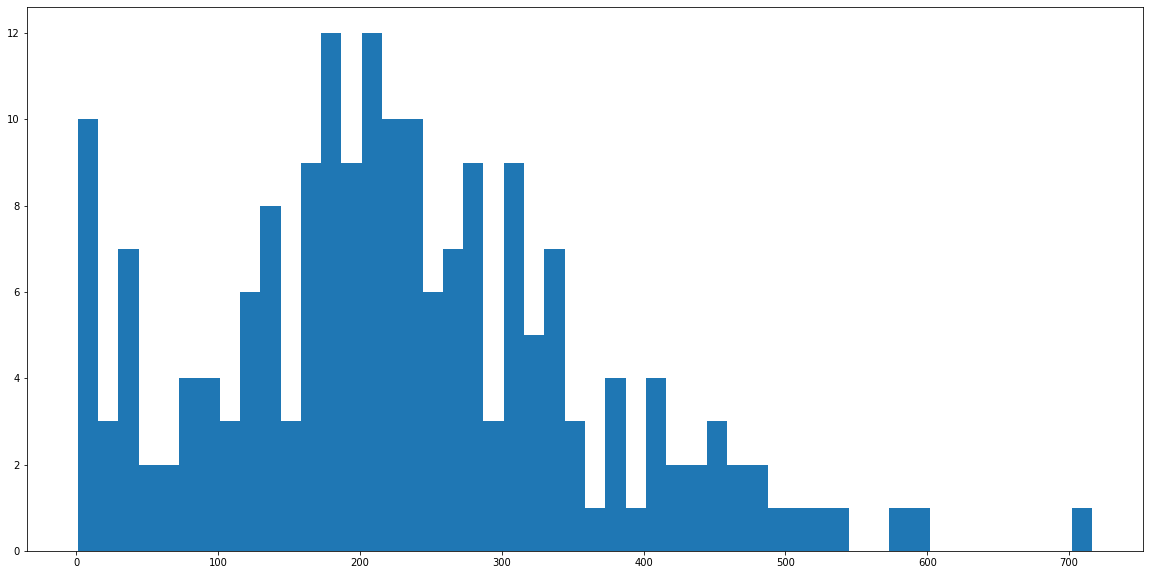

In [56]:
per_gc=[]

for i in range(0,len(p),1):
    if 'GC' in assoc[i]:
        #if p[i]<0.2:
        per_gc.append(p[i])
        
        
bins = 50
plt.figure(figsize=(20,10))
plt.xticks()
freq=[]
for pvar in per_gc:
    freq.append(1./pvar)
#plt.xlim(0.001,0.15)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(freq, bins=bins);
        
#len_gc=np.arange(0,len(per_gc),1)
#plt.scatter(len_gc,per_gc)
#print(len_gc)
#print(len(per_gc))